In [1]:
try:
    import xml.etree.cElementTree as ET
except ImportError:
    import xml.etree.ElementTree as ET
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.signal as signal

# 处理路径数据，建立data_feature离散表

## 解析路径文件

In [2]:
xml_path = r'C:\jupyter notebook\熔池数据\k438layer103\Data\103_20210316121817.xml'
tree = ET.parse(xml_path)
root = tree.getroot() #获取根节点
feature = tree.findall('FEATURE') #获取feature节点列表

In [3]:
num_fea = len(feature)

all_type_line_point = []
data_feature = pd.DataFrame()
#获取feature列表的特征属性信息
for i, child_f in enumerate(feature):
    index_ = int(child_f.get('INDEX')) #获取feature的几个属性index=0,1代表不同激光器
    type_ = int(child_f.get('TYPE')) # 不同特征，5为实体
    count_ = int(child_f.get('COUNT')) #count=1，0，代表扫描几次
    power_ = int(child_f.get('POWER')) #功率
    speed_ = int(child_f.get('SPEED')) #速度
    print (index_, type_, count_, power_, speed_)
    data_feature = data_feature.append({'laser_index':index_,'type':type_,'count':count_,'power':power_,'speed':speed_},
                                       ignore_index = True)
    
    #多激光需添加激光索引一致性和扫描次数count判断
    #在获取特征集合中polyline的集合
    #获取polyline节点数量num_poly
    #如果节点数量不等于0，速度不等于0；则num+1
    num = 0
    type_i_line_point = []
    if count_ != "0":
        for i,child_p in enumerate(child_f.iterfind("POLYLINE")):
            polyline_array = np.array(child_p.text.split(',')).astype(float)
            type_i_line_point.append(list(polyline_array[1:]))
            num += 1
    all_type_line_point.append(type_i_line_point)

all_type_line_point = np.array(all_type_line_point)    
data_feature['polyline'] = all_type_line_point

0 11 0 0 0
0 5 1 255 1200
0 11 0 0 0
0 5 1 255 1200
0 11 0 0 0
0 5 1 255 1200
0 11 0 0 0
0 5 1 255 1200
0 11 0 0 0
0 5 1 255 1200
0 11 0 0 0
0 5 1 255 1200
0 11 0 0 0
0 5 1 255 1200
0 11 0 0 0
0 5 1 215 1200
0 11 0 0 0
0 5 1 225 1200
0 11 0 0 0
0 5 1 235 1200
0 11 0 0 0
0 5 1 245 1200
0 11 0 0 0
0 5 1 255 1200
0 11 0 0 0
0 5 1 265 1200
0 11 0 0 0
0 5 1 275 1200
0 11 0 0 0
0 5 1 285 1200
0 11 0 0 0
0 5 1 295 1200


C:\Users\cheng\AppData\Local\Temp/ipykernel_8856/553079064.py:29: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  all_type_line_point = np.array(all_type_line_point)


In [4]:
data_feature

,laser_index,type,count,power,speed,polyline
0,0.0,11.0,0.0,0.0,0.0,"[[122.7, 49.48, 121.66, 49.1, 115.18, 46.74, 1..."
1,0.0,5.0,1.0,255.0,1200.0,"[[117.891, 39.27, 118.084, 39.27], [118.274, 3..."
2,0.0,11.0,0.0,0.0,0.0,"[[49.21, 83.44, 46.85, 89.92, 45.81, 89.54, 39..."
3,0.0,5.0,1.0,255.0,1200.0,"[[42.0485, 79.7, 42.1828, 79.7], [42.322, 79.7..."
4,0.0,11.0,0.0,0.0,0.0,"[[101.1, 82.4, 100.72, 83.44, 98.36, 89.92, 97..."
5,0.0,5.0,1.0,255.0,1200.0,"[[93.5658, 79.68, 93.6376, 79.68], [93.8063, 7..."
6,0.0,11.0,0.0,0.0,0.0,"[[152.24, 83.44, 149.88, 89.92, 148.85, 89.54,..."
7,0.0,5.0,1.0,255.0,1200.0,"[[145.093, 79.66, 145.101, 79.66], [145.296, 7..."
8,0.0,11.0,0.0,0.0,0.0,"[[203.76, 83.44, 201.4, 89.92, 200.36, 89.54, ..."
9,0.0,5.0,1.0,255.0,1200.0,"[[196.606, 79.68, 196.677, 79.68], [196.9, 79...."


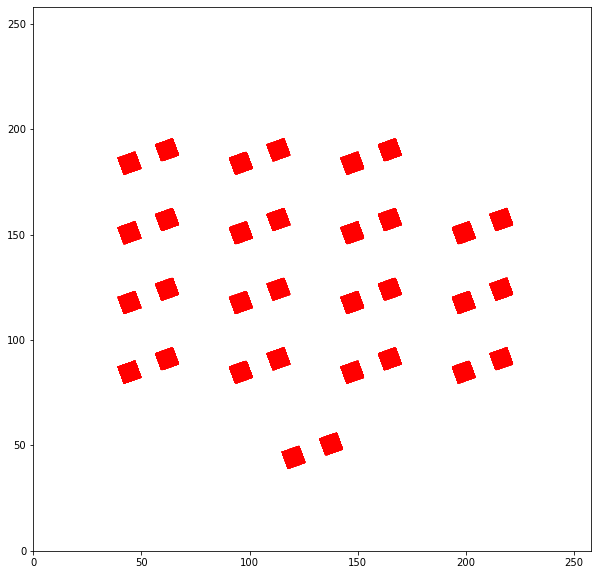

In [4]:
plt.figure(figsize=(10,10))
plt.xlim(0,258)
plt.ylim(0,258)

for row_index in data_feature.index:
    poly_data = data_feature.loc[row_index,'polyline']
    for i in range(len(poly_data)):
        poly_data[i] = np.array(poly_data[i]).reshape(-1,1,2)
        plt.plot(poly_data[i][:,:,0],poly_data[i][:,:,1],ls = '-',c='r')

plt.show()

## 只处理激光烧结数据，即count==1 数据

In [4]:
## 考虑扫描次数，应设置 ！=0，再根据==1或==2分析
data_feature_sinter_1 = data_feature.loc[data_feature['count'] == 1] 

In [5]:
data_feature_sinter_1

,laser_index,type,count,power,speed,polyline
1,0.0,5.0,1.0,255.0,1200.0,"[[117.891, 39.27, 118.084, 39.27], [118.274, 3..."
3,0.0,5.0,1.0,255.0,1200.0,"[[42.0485, 79.7, 42.1828, 79.7], [42.322, 79.7..."
5,0.0,5.0,1.0,255.0,1200.0,"[[93.5658, 79.68, 93.6376, 79.68], [93.8063, 7..."
7,0.0,5.0,1.0,255.0,1200.0,"[[145.093, 79.66, 145.101, 79.66], [145.296, 7..."
9,0.0,5.0,1.0,255.0,1200.0,"[[196.606, 79.68, 196.677, 79.68], [196.9, 79...."
11,0.0,5.0,1.0,255.0,1200.0,"[[42.0413, 112.77, 42.2341, 112.77], [42.4781,..."
13,0.0,5.0,1.0,255.0,1200.0,"[[93.5404, 112.8, 93.8278, 112.8], [94.1015, 1..."
15,0.0,5.0,1.0,215.0,1200.0,"[[145.071, 112.77, 145.264, 112.77], [145.454,..."
17,0.0,5.0,1.0,225.0,1200.0,"[[196.591, 112.77, 196.784, 112.77], [196.974,..."
19,0.0,5.0,1.0,235.0,1200.0,"[[42.0485, 145.81, 42.1799, 145.81], [42.3697,..."


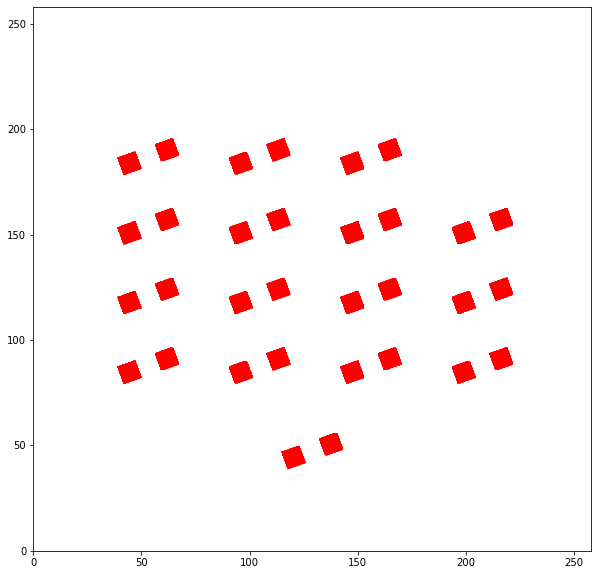

In [6]:
plt.figure(figsize=(10,10))
plt.xlim(0,258)
plt.ylim(0,258)

for row_index in data_feature_sinter_1.index:
    poly_data = data_feature_sinter_1.loc[row_index,'polyline']
    for i in range(len(poly_data)):
        poly_data[i] = np.array(poly_data[i]).reshape(-1,1,2)
        plt.plot(poly_data[i][:,:,0],poly_data[i][:,:,1],ls = '-',c='r')

plt.show()

## 按特征分组特征数据

In [20]:
group = data_feature.groupby('type')

In [23]:
for key, df in group:
    print(key)
    print(df)
    print("")

5.0
    laser_index  type  count  power   speed  \
1           0.0   5.0    1.0  255.0  1200.0   
3           0.0   5.0    1.0  255.0  1200.0   
5           0.0   5.0    1.0  255.0  1200.0   
7           0.0   5.0    1.0  255.0  1200.0   
9           0.0   5.0    1.0  255.0  1200.0   
11          0.0   5.0    1.0  255.0  1200.0   
13          0.0   5.0    1.0  255.0  1200.0   
15          0.0   5.0    1.0  215.0  1200.0   
17          0.0   5.0    1.0  225.0  1200.0   
19          0.0   5.0    1.0  235.0  1200.0   
21          0.0   5.0    1.0  245.0  1200.0   
23          0.0   5.0    1.0  255.0  1200.0   
25          0.0   5.0    1.0  265.0  1200.0   
27          0.0   5.0    1.0  275.0  1200.0   
29          0.0   5.0    1.0  285.0  1200.0   
31          0.0   5.0    1.0  295.0  1200.0   

                                             polyline  
1   [[[[117.891  39.27 ]], [[118.084  39.27 ]]], [...  
3   [[[[42.0485 79.7   ]], [[42.1828 79.7   ]]], [...  
5   [[[[93.5658 79.68  ]], [

# 加载熔池数据

## 加载数据，并将数据表格化

In [5]:
#加载数据，并将数据表格化
data_pd_0 = np.loadtxt(r'C:\jupyter notebook\熔池数据\k438layer103\Data\channel1_20210316121817.txt')
data_sw = np.loadtxt(r'C:\jupyter notebook\熔池数据\k438layer103\Data\channel2_20210316121817.txt')
data_pw = np.loadtxt(r'C:\jupyter notebook\熔池数据\k438layer103\Data\channel3_20210316121817.txt')

mp_df =pd.concat([pd.DataFrame({'data_pd_0': data_pd_0}) ,pd.DataFrame({'data_sw':data_sw}),
                      pd.DataFrame({'data_pw':data_pw})],axis=1)

<AxesSubplot:>

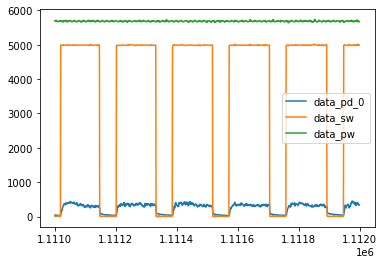

In [25]:
mp_df[1111000:1112000].plot()

## 数据滤波

In [6]:
#对熔池三路数据进行中值滤波降噪
mp_df = mp_df.fillna(method='ffill')
mp_df['data_pd_0'] = signal.medfilt(mp_df['data_pd_0'],5)
mp_df['data_sw'] = signal.medfilt(mp_df['data_sw'],5)
mp_df['data_pw'] = signal.medfilt(mp_df['data_pw'],15)

<AxesSubplot:>

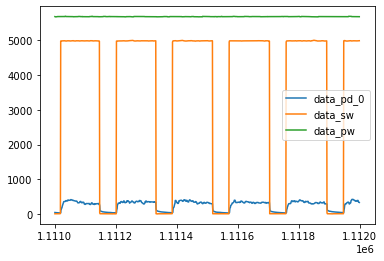

In [10]:
mp_df[1111000:1112000].plot()

<AxesSubplot:>

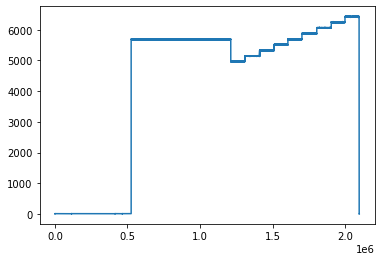

In [11]:
mp_df['data_pw'].plot()

In [138]:
# # 计算时间
# fs = 50E3 #频率
# t = [i/fs for i in range(len(mp_df['data_sw']))] 

In [7]:
#不同频率采样，数据等间隔求差计算功率分割
import math
fs = 50E3 
pw_interval = max(math.ceil(fs/25E3),1) #25E3是将不同采样率进行归一化取整的等间隔参数，可修改。ceil向上取整

## 功率分段

- 内嵌函数算子目前存在取变化值不合理问题。

In [15]:
constant_pw_split = 50 #功率分割判断常量

#写法运算更快，上升沿取值一致，下降沿取值不一致
power_change_index = [i for i in range(pw_interval,len(mp_df['data_pw']) - pw_interval)\
                     if abs(mp_df['data_pw'].iloc[i] - mp_df['data_pw'].iloc[i-pw_interval])
                      >= constant_pw_split]

# for i in range(len(mp_df['data_pw']) - pw_interval):
#     if mp_df['data_pw'].iloc[i+pw_interval] - mp_df['data_pw'].iloc[i] >= constant_pw_split:
#         power_change_index.append(i+pw_interval)
#     elif mp_df['data_pw'].iloc[i+pw_interval] - mp_df['data_pw'].iloc[i] <= -constant_pw_split:
#         power_change_index.append(i)


In [16]:
power_change_index

[525541,
 525542,
 1212006,
 1212007,
 1309077,
 1309078,
 1309079,
 1410839,
 1410840,
 1511023,
 1511024,
 1605796,
 1605797,
 1702895,
 1702896,
 1804665,
 1804666,
 1904852,
 1904853,
 1999613,
 1999614,
 2096713,
 2096714]

In [8]:
# 运算更慢
constant_pw_split = 50 #功率分割判断常量

power_change_index = []
for i in range(len(mp_df['data_pw']) - pw_interval):
    if mp_df['data_pw'].iloc[i+pw_interval] - mp_df['data_pw'].iloc[i] >= constant_pw_split:
        power_change_index.append(i+pw_interval)
    elif mp_df['data_pw'].iloc[i+pw_interval] - mp_df['data_pw'].iloc[i] <= -constant_pw_split:
        power_change_index.append(i)

In [29]:
power_change_index

[525541,
 525542,
 1212004,
 1212005,
 1309077,
 1309078,
 1309079,
 1410839,
 1410840,
 1511023,
 1511024,
 1605796,
 1605797,
 1702895,
 1702896,
 1804665,
 1804666,
 1904852,
 1904853,
 1999613,
 1999614,
 2096711,
 2096712]

<AxesSubplot:>

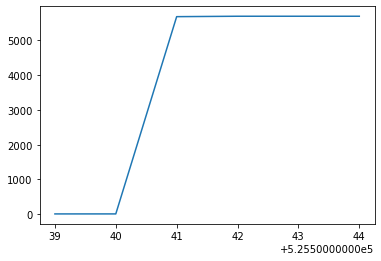

In [104]:
mp_df['data_pw'][525539:525545].plot()

<AxesSubplot:>

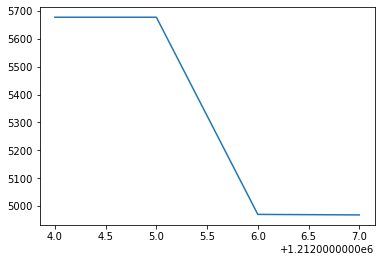

In [102]:
mp_df['data_pw'][1212004:1212008].plot()

<AxesSubplot:>

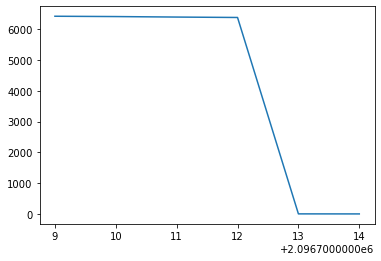

In [105]:
mp_df['data_pw'][2096709:2096715].plot()

<AxesSubplot:>

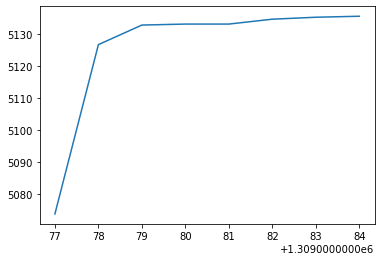

In [23]:
mp_df['data_pw'][1309077:1309085].plot()

- 功率降低时，应取变化前的最后一个索引位置

In [46]:
# 阶跃大于constant_pw_split存在两个或以上连续点，剔除并留一个
# power_change_index_new = []

# for i in range(len(power_change_index)-1):
#     if abs(power_change_index[i+1]-power_change_index[i]) >=2: #保留一组最后点数,
#         power_change_index_new.append(power_change_index[i])
        
# power_change_index_new.append(power_change_index[-1]) 

In [9]:
# 阶跃大于constant_pw_split存在两个或以上连续点，剔除并留一个
power_change_index_new = [power_change_index[i] for i in range(len(power_change_index)-1)\
                         if abs(power_change_index[i+1]-power_change_index[i]) >=2] #保留一组最后点数,
power_change_index_new.append(power_change_index[-1])

In [10]:
power_change_index_new

[525542,
 1212005,
 1309079,
 1410840,
 1511024,
 1605797,
 1702896,
 1804666,
 1904853,
 1999614,
 2096712]

In [11]:
if power_change_index_new ==[] or len(power_change_index_new) <=1:
    print('错误，该层数据损坏；未找到匹配功率数据')

## 开关索引

In [33]:
mp_df.head()

,data_pd_0,data_sw,data_pw
0,-4.27,7.02,4.58
1,-5.19,7.02,4.58
2,-6.41,7.02,5.19
3,-6.41,7.02,5.80
4,-6.41,3.36,6.41


- lambda用法 x = lambda n: n if n%10 == 0 else ( n**2 if n%2 == 0 else n**3 )

In [12]:
constant_sw_split = 2500

mp_df['data_sw'] = mp_df['data_sw'].apply(lambda x:0 if x <= constant_sw_split else 1)

<AxesSubplot:>

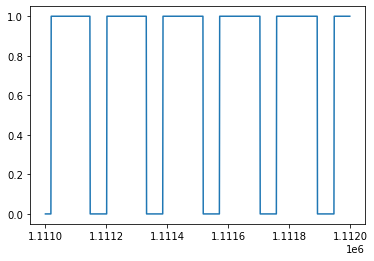

In [35]:
mp_df['data_sw'][1111000:1112000].plot()

In [117]:
mp_df['data_sw'].diff()

0          NaN
1          0.0
2          0.0
3          0.0
4          0.0
          ... 
2098021    0.0
2098022    0.0
2098023    0.0
2098024    0.0
2098025    0.0
Name: data_sw, Length: 2098026, dtype: float64

In [13]:
indexup = mp_df[mp_df['data_sw'].diff()>0].index.to_numpy()
indexdown = mp_df[mp_df['data_sw'].diff()<0].index.to_numpy()

In [14]:
num_sw = len(indexdown)

# 路径数据与熔池数据关联
## 熔池数据按功率分割编号，开关编号

In [38]:
data_feature_sinter_1

,laser_index,type,count,power,speed,polyline
1,0.0,5.0,1.0,255.0,1200.0,"[[[[117.891 39.27 ]], [[118.084 39.27 ]]], [..."
3,0.0,5.0,1.0,255.0,1200.0,"[[[[42.0485 79.7 ]], [[42.1828 79.7 ]]], [..."
5,0.0,5.0,1.0,255.0,1200.0,"[[[[93.5658 79.68 ]], [[93.6376 79.68 ]]], [..."
7,0.0,5.0,1.0,255.0,1200.0,"[[[[145.093 79.66 ]], [[145.101 79.66 ]]], [..."
9,0.0,5.0,1.0,255.0,1200.0,"[[[[196.606 79.68 ]], [[196.677 79.68 ]]], [..."
11,0.0,5.0,1.0,255.0,1200.0,"[[[[ 42.0413 112.77 ]], [[ 42.2341 112.77 ]]..."
13,0.0,5.0,1.0,255.0,1200.0,"[[[[ 93.5404 112.8 ]], [[ 93.8278 112.8 ]]..."
15,0.0,5.0,1.0,215.0,1200.0,"[[[[145.071 112.77 ]], [[145.264 112.77 ]]], [..."
17,0.0,5.0,1.0,225.0,1200.0,"[[[[196.591 112.77 ]], [[196.784 112.77 ]]], [..."
19,0.0,5.0,1.0,235.0,1200.0,"[[[[ 42.0485 145.81 ]], [[ 42.1799 145.81 ]]..."


In [15]:
data_feature_sinter_1.reset_index(drop=True, inplace=True)

In [16]:
data_feature_sinter_1

,laser_index,type,count,power,speed,polyline
0,0.0,5.0,1.0,255.0,1200.0,"[[117.891, 39.27, 118.084, 39.27], [118.274, 3..."
1,0.0,5.0,1.0,255.0,1200.0,"[[42.0485, 79.7, 42.1828, 79.7], [42.322, 79.7..."
2,0.0,5.0,1.0,255.0,1200.0,"[[93.5658, 79.68, 93.6376, 79.68], [93.8063, 7..."
3,0.0,5.0,1.0,255.0,1200.0,"[[145.093, 79.66, 145.101, 79.66], [145.296, 7..."
4,0.0,5.0,1.0,255.0,1200.0,"[[196.606, 79.68, 196.677, 79.68], [196.9, 79...."
5,0.0,5.0,1.0,255.0,1200.0,"[[42.0413, 112.77, 42.2341, 112.77], [42.4781,..."
6,0.0,5.0,1.0,255.0,1200.0,"[[93.5404, 112.8, 93.8278, 112.8], [94.1015, 1..."
7,0.0,5.0,1.0,215.0,1200.0,"[[145.071, 112.77, 145.264, 112.77], [145.454,..."
8,0.0,5.0,1.0,225.0,1200.0,"[[196.591, 112.77, 196.784, 112.77], [196.974,..."
9,0.0,5.0,1.0,235.0,1200.0,"[[42.0485, 145.81, 42.1799, 145.81], [42.3697,..."


In [16]:
data_feature_sinter_2 = data_feature_sinter_1.iloc[7:]

In [17]:
data_feature_sinter_2.reset_index(drop=True)

,laser_index,type,count,power,speed,polyline
0,0.0,5.0,1.0,215.0,1200.0,"[[145.071, 112.77, 145.264, 112.77], [145.454,..."
1,0.0,5.0,1.0,225.0,1200.0,"[[196.591, 112.77, 196.784, 112.77], [196.974,..."
2,0.0,5.0,1.0,235.0,1200.0,"[[42.0485, 145.81, 42.1799, 145.81], [42.3697,..."
3,0.0,5.0,1.0,245.0,1200.0,"[[93.5585, 145.81, 93.6909, 145.81], [93.8825,..."
4,0.0,5.0,1.0,255.0,1200.0,"[[145.079, 145.81, 145.21, 145.81], [145.4, 14..."
5,0.0,5.0,1.0,265.0,1200.0,"[[196.599, 145.81, 196.73, 145.81], [196.92, 1..."
6,0.0,5.0,1.0,275.0,1200.0,"[[42.0558, 178.85, 42.1272, 178.85], [42.322, ..."
7,0.0,5.0,1.0,285.0,1200.0,"[[93.5658, 178.85, 93.6377, 178.85], [93.8344,..."
8,0.0,5.0,1.0,295.0,1200.0,"[[145.086, 178.85, 145.157, 178.85], [145.352,..."


In [43]:
power_change_index_new

[525542,
 1212005,
 1309079,
 1410840,
 1511024,
 1605797,
 1702896,
 1804666,
 1904853,
 1999614,
 2096712]

In [18]:
#熔池数据添加工艺分段编号列
mp_df['gyfg'] = np.nan
for i in range(len(power_change_index_new)-1):
    mp_df.loc[power_change_index_new[i]:1+power_change_index_new[i+1],'gyfg'] = int(i)
#     mp_df['gyfg'].iloc[power_change_index_new[i]:1+power_change_index_new[i+1]] =int(i) #会引发链式索引

<AxesSubplot:>

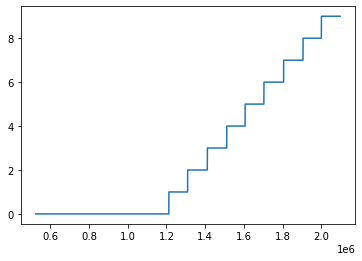

In [45]:
mp_df['gyfg'].plot()

In [19]:
mp_df['xdfg'] = np.nan
for i in range(num_sw):
    mp_df.iloc[indexup[i]:indexdown[i],4] = i
#     mp_df['xdfg'].iloc[indexup[i]:indexdown[i]] = i #会引发链式索引

<AxesSubplot:>

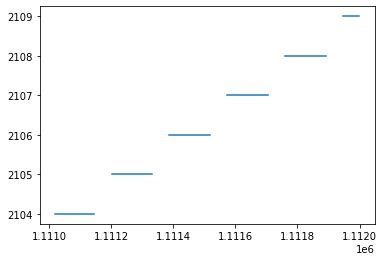

In [47]:
mp_df['xdfg'][1111000:1112000].plot()

In [48]:
mp_df

,data_pd_0,data_sw,data_pw,gyfg,xdfg
0,-4.27,0,4.58,NaN,NaN
1,-5.19,0,4.58,NaN,NaN
2,-6.41,0,5.19,NaN,NaN
3,-6.41,0,5.80,NaN,NaN
4,-6.41,0,6.41,NaN,NaN
...,...,...,...,...,...
2098021,-5.80,0,7.63,NaN,NaN
2098022,-5.80,0,7.63,NaN,NaN
2098023,-5.80,0,7.32,NaN,NaN
2098024,-4.58,0,6.71,NaN,NaN


## 按熔道统计分析计算

- 计算每条熔道的最大值、最小值、极差、均值、方差、标准差、均方根、偏度、峰度、波形因子、峰值因子、脉冲因子、裕度因子

In [20]:
#计算熔道特征（RD_group)
RD_grouped =mp_df.groupby(['gyfg','xdfg'])

In [21]:
RD_grouped.mean()

data_pd_0  data_sw      data_pw
gyfg xdfg                                    
0.0  0.0     167.212857      1.0  5687.260000
     1.0     195.564348      1.0  5684.936522
     2.0     231.045000      1.0  5689.031875
     3.0     215.923415      1.0  5687.271220
     4.0     262.096600      1.0  5686.920400
...                 ...      ...          ...
9.0  5499.0  289.368800      1.0  6418.061800
     5500.0  260.941250      1.0  6419.024750
     5501.0  224.647419      1.0  6418.113871
     5502.0  204.509545      1.0  6421.591818
     5503.0  190.642308      1.0  6415.454615

[5504 rows x 3 columns]

In [32]:
RD_mean = RD_grouped['data_pd_0'].mean()  # 均值
RD_max = RD_grouped['data_pd_0'].max()  # 最大值
RD_min = RD_grouped['data_pd_0'].min()  # 最小值
RD_median = RD_grouped['data_pd_0'].median()  # 中位数
RD_std = RD_grouped['data_pd_0'].std()  # 标准差
RD_mad = RD_grouped['data_pd_0'].mad()  # 平均绝对偏差
RD_skew = RD_grouped['data_pd_0'].skew()  # 偏度
RD_kurt = RD_grouped['data_pd_0'].apply(pd.DataFrame.kurt)  # 峰度

In [33]:
RD_mean

gyfg  xdfg  
0.0   0.0       167.212857
      1.0       195.564348
      2.0       231.045000
      3.0       215.923415
      4.0       262.096600
                   ...    
9.0   5499.0    289.368800
      5500.0    260.941250
      5501.0    224.647419
      5502.0    204.509545
      5503.0    190.642308
Name: data_pd_0, Length: 5504, dtype: float64

# 读取工程文件下的部分层数据进行分析计算

In [1]:
from pathlib import Path
try:
    import xml.etree.cElementTree as ET
except ImportError:
    import xml.etree.ElementTree as ET
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.signal as signal
import os
import math

熔池目录子目录读取成列表并排序

In [23]:
input_path = Path(r'C:\jupyter notebook\熔池数据\20210316_20210316094436_K438')

child_dir_list = [child for child in input_path.iterdir() if child.is_dir()]

child_dir_list.sort(key=lambda x : int(x.parts[-1][5:]))

In [25]:
child_dir_list

[WindowsPath('C:/jupyter notebook/熔池数据/20210316_20210316094436_K438/layer11'),
 WindowsPath('C:/jupyter notebook/熔池数据/20210316_20210316094436_K438/layer12'),
 WindowsPath('C:/jupyter notebook/熔池数据/20210316_20210316094436_K438/layer13'),
 WindowsPath('C:/jupyter notebook/熔池数据/20210316_20210316094436_K438/layer14'),
 WindowsPath('C:/jupyter notebook/熔池数据/20210316_20210316094436_K438/layer15'),
 WindowsPath('C:/jupyter notebook/熔池数据/20210316_20210316094436_K438/layer16'),
 WindowsPath('C:/jupyter notebook/熔池数据/20210316_20210316094436_K438/layer17'),
 WindowsPath('C:/jupyter notebook/熔池数据/20210316_20210316094436_K438/layer18'),
 WindowsPath('C:/jupyter notebook/熔池数据/20210316_20210316094436_K438/layer19'),
 WindowsPath('C:/jupyter notebook/熔池数据/20210316_20210316094436_K438/layer20'),
 WindowsPath('C:/jupyter notebook/熔池数据/20210316_20210316094436_K438/layer21'),
 WindowsPath('C:/jupyter notebook/熔池数据/20210316_20210316094436_K438/layer22'),
 WindowsPath('C:/jupyter notebook/熔池数据/20210316_2021

In [ ]:



xml_path = r'C:\jupyter notebook\熔池数据\k438layer103\Data\103_20210316121817.xml'
tree = ET.parse(xml_path)
root = tree.getroot() #获取根节点
feature = tree.findall('FEATURE') #获取feature节点列表